# Author : Anuradha

In [ ]:
# Load Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
telco=pd.read_excel("C:/7-clustering/Telco_customer_churn.xlsx")


# Data preprocessing

In [4]:
telco.describe()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [7]:
telco.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [9]:
telco.shape

(7043, 30)

In [13]:
# Check for null values
print(telco.isnull().sum())

Customer ID                             0
Count                                   0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                    

In [21]:
# there are 2 columns with missing values i.e ofeer with 3877 and internet type with 1526
# now we have  to handle this missing vlues for that check the data type of the columns
print(telco.dtypes)

Customer ID                           object
Count                                  int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless 

In [31]:
# offer and internet type has object data type so we need to convert it into numerical form so apply one hot encoding for it 
telco = pd.get_dummies(telco, drop_first=True)

In [37]:
# now normalize the other columns like int64 and float64 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = telco.select_dtypes(include=['int64', 'float64']).columns
telco[numeric_columns] = scaler.fit_transform(telco[numeric_columns])


# Elbow curve

In [60]:
# Initilize variable to store wcss 
from sklearn.cluster import KMeans 

wcss = []
k_values = range(1,10)
for k in k_values:
    kmeans = KMeans(n_clusters= k, init='k-means++', random_state=42)
    kmeans.fit(telco)
    wcss.append(kmeans.inertia_)

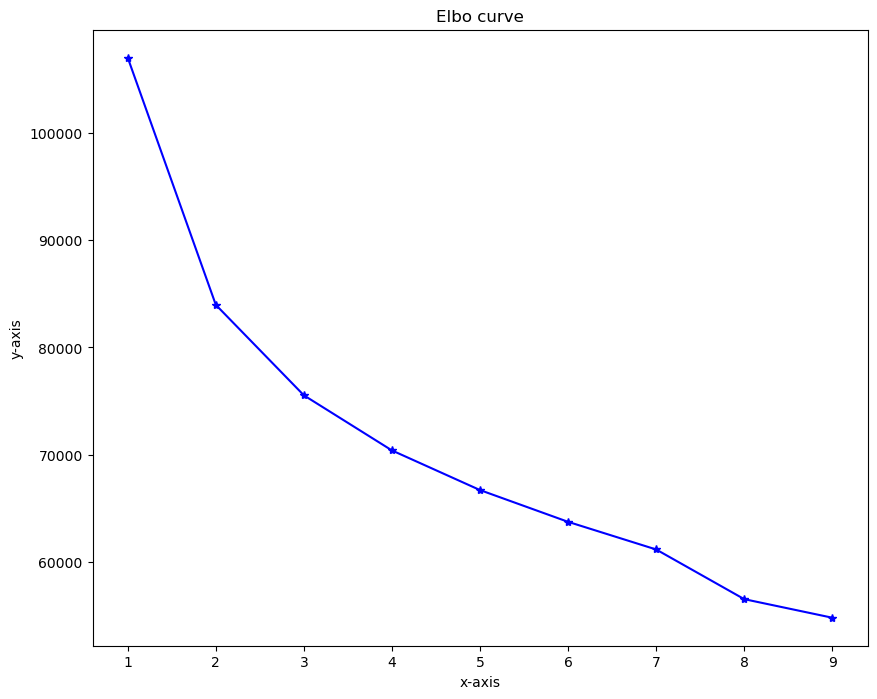

In [76]:
# plot elbo curve 
plt.figure(figsize=(10,8))
plt.plot(k_values,wcss, marker="*", color="blue")
plt.title("Elbo curve")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

# K-Means clustering

In [80]:


km = KMeans(n_clusters=2, random_state=42)
y_predicted = km.fit_predict(telco[numeric_columns])

In [82]:
telco['cluster'] = y_predicted

telco.head()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,...,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,cluster
0,0.0,-0.650409,-1.278988,-1.486303,-0.612975,-0.834611,-0.988823,-0.248313,0.523411,-0.884833,...,False,True,False,False,False,False,True,False,False,0
1,0.0,-0.317185,-0.993743,1.676120,-0.172176,0.528063,-0.726848,-0.248313,-0.273300,-0.423221,...,False,False,False,True,False,False,True,True,False,0
2,0.0,-0.650409,-0.586250,-0.752828,1.542040,1.019955,-0.232929,5.523605,-0.273300,-0.643940,...,True,True,True,True,False,False,True,False,False,0
3,0.0,-0.317185,-0.301005,-0.207092,-0.417064,1.121324,0.103315,1.451245,-0.273300,-0.301322,...,True,True,False,True,False,False,True,False,False,0
4,0.0,-0.317185,0.187986,-1.076516,-0.319109,0.390134,0.259379,-0.248313,-0.273300,-0.608185,...,False,False,False,True,False,False,True,False,False,0


In [84]:
print("Cluster Centers (scaled):")
print(km.cluster_centers_)

Cluster Centers (scaled):
[[ 0.         -0.18946209 -0.52450943 -0.16186867 -0.13710201 -0.36058748
  -0.59594477 -0.02849176 -0.08545648 -0.49045823 -0.61695904]
 [ 0.          0.36979253  1.02373865  0.31593561  0.26759601  0.70379543
   1.16316629  0.05561029  0.16679414  0.95727743  1.20418199]]
